# 1 original

In [2]:
PLAYER, COMPUTER, EMPTY = "X", "O", " "
board = [EMPTY] * 9

def check_winner(p):
    return any(board[a] == board[b] == board[c] == p for a, b, c in [(0,1,2),(3,4,5),(6,7,8),(0,3,6),(1,4,7),(2,5,8),(0,4,8),(2,4,6)])

def dfs(turn):
    if check_winner(COMPUTER): return 10
    if check_winner(PLAYER): return -10
    if EMPTY not in board: return 0
    best = -1000 if turn else 1000
    for i in range(9):
        if board[i] == EMPTY:
            board[i] = COMPUTER if turn else PLAYER
            best = max(best, dfs(not turn)) if turn else min(best, dfs(not turn))
            board[i] = EMPTY
    return best
    
def find_best_move():
    return max((i for i in range(9) if board[i] == EMPTY), 
              key = lambda i: (board.__setitem__(i, COMPUTER), v:=dfs(False),
              board.__setitem__(i, EMPTY), v) [3], default=-1)

def play_game():
    while True:
        print("\n".join(" | ".join(board[i:i+3]) for i in range(0, 9, 3)))
        p_move = int(input("Enter move (0-8): "))
        if board[p_move] != EMPTY: print("Invalid move! Try again."); continue
        board[p_move] = PLAYER
        if check_winner(PLAYER): print("Player wins!"); break
        if EMPTY not in board: print("Tie!"); break
        print("Computer's move...")
        board[find_best_move()] = COMPUTER
        if check_winner(COMPUTER): print("Computer wins!"); break
        if EMPTY not in board: print("Tie!"); break
            
play_game()

  |   |  
  |   |  
  |   |  
Enter move (0-8): 0
Computer's move...
X |   |  
  | O |  
  |   |  
Enter move (0-8): 8
Computer's move...
X | O |  
  | O |  
  |   | X
Enter move (0-8): 7
Computer's move...
X | O |  
  | O |  
O | X | X
Enter move (0-8): 2
Computer's move...
X | O | X
  | O | O
O | X | X
Enter move (0-8): 3
Tie!


# 1 gpt v1

In [3]:
import random

board = [" "] * 9
PLAYER = "X"
COMPUTER = "O"

def print_board():
    for i in range(0, 9, 3):
        print(" | ".join(board[i:i+3]))
    print()

def check_winner(p):
    win_combos = [(0,1,2), (3,4,5), (6,7,8),
                  (0,3,6), (1,4,7), (2,5,8),
                  (0,4,8), (2,4,6)]
    for a, b, c in win_combos:
        if board[a] == board[b] == board[c] == p:
            return True
    return False

def play_game():
    while True:
        print_board()
        move = int(input("Your move (0-8): "))
        if board[move] != " ":
            print("Invalid! Try again.")
            continue
        board[move] = PLAYER
        if check_winner(PLAYER):
            print_board()
            print("You win!")
            break
        if " " not in board:
            print_board()
            print("It's a tie!")
            break

        print("Computer's move...")
        while True:
            comp_move = random.randint(0, 8)
            if board[comp_move] == " ":
                board[comp_move] = COMPUTER
                break
        if check_winner(COMPUTER):
            print_board()
            print("Computer wins!")
            break
        if " " not in board:
            print_board()
            print("It's a tie!")
            break

play_game()

  |   |  
  |   |  
  |   |  

Your move (0-8): 0
Computer's move...
X |   | O
  |   |  
  |   |  

Your move (0-8): 3
Computer's move...
X |   | O
X |   |  
  |   | O

Your move (0-8): 6
X |   | O
X |   |  
X |   | O

You win!


# 1 gpt v2

In [4]:
import random

board = [" "] * 9
PLAYER, COMPUTER = "X", "O"

def show():
    print("\n".join(" | ".join(board[i:i+3]) for i in range(0, 9, 3)), "\n")

def win(p):
    return any(board[a]==board[b]==board[c]==p for a,b,c in [(0,1,2),(3,4,5),(6,7,8),(0,3,6),(1,4,7),(2,5,8),(0,4,8),(2,4,6)])

def game():
    while True:
        show()
        m = int(input("Your move (0-8): "))
        if board[m] != " ": print("Invalid!"); continue
        board[m] = PLAYER
        if win(PLAYER): show(); print("You win!"); break
        if " " not in board: show(); print("It's a tie!"); break

        while True:
            cm = random.randint(0,8)
            if board[cm] == " ":
                board[cm] = COMPUTER
                break
        if win(COMPUTER): show(); print("Computer wins!"); break
        if " " not in board: show(); print("It's a tie!"); break

game()


  |   |  
  |   |  
  |   |   

Your move (0-8): 7
  |   |  
  |   | O
  | X |   

Your move (0-8): 5
Invalid!
  |   |  
  |   | O
  | X |   

Your move (0-8): 6
O |   |  
  |   | O
X | X |   

Your move (0-8): 4
O | O |  
  | X | O
X | X |   

Your move (0-8): 3
O | O | O
X | X | O
X | X |   

Computer wins!


# 2 og

In [5]:
def count_inversions(puzzle):
    tiles=[tile for tile in puzzle if tile != 0]
    inversions = sum(1 for i in range(len(tiles)) for j in range(i+1, len(tiles)) if tiles[i] > tiles[j])
    return inversions

def is_solvable(puzzle):
    return count_inversions(puzzle) % 2 == 0

def get_user_puzzle():
    print("\nEnter the 8-puzzle configuration as 9 space-separated numbers (0 represents the empty space).")
    user_input = input("Example: 1 2 3 4 5 6 7 8 0\nYour puzzle: ")
    puzzle = list(map(int, user_input.split()))
    if len(puzzle) != 9 or set(puzzle) != set(range(9)):
        print("Invalid input! Please enter numbers 0-8 exactly once.")
        return get_user_puzzle()
    return puzzle

def main():
    while True:
        puzzle = get_user_puzzle()
        result = "Solvable" if is_solvable(puzzle) else "Not Solvable"
        print(f"Puzzle: {puzzle} -> {result}")
        again = input("\n Do you want to test another puzzle ? (yes/no): ").strip().lower()
        if again != 'yes' :
              print("Exciting program. Goodbye!")
              break
              
main()


Enter the 8-puzzle configuration as 9 space-separated numbers (0 represents the empty space).
Example: 1 2 3 4 5 6 7 8 0
Your puzzle: 1 2 3 4 5 6 7 0 8
Puzzle: [1, 2, 3, 4, 5, 6, 7, 0, 8] -> Solvable

 Do you want to test another puzzle ? (yes/no): no
Exciting program. Goodbye!


# 2 gpt

In [6]:
def count_inversions(puzzle):
    count = 0
    for i in range(8):
        for j in range(i + 1, 9):
            if puzzle[i] != 0 and puzzle[j] != 0 and puzzle[i] > puzzle[j]:
                count += 1
    return count

def is_solvable(puzzle):
    inversions = count_inversions(puzzle)
    return inversions % 2 == 0

puzzle = list(map(int, input("Enter 9 numbers (0 to 8) separated by spaces: ").split()))

if len(puzzle) != 9 or set(puzzle) != set(range(9)):
    print("Invalid input! Use numbers 0 to 8 exactly once.")
else:
    if is_solvable(puzzle):
        print("Solvable")
    else:
        print("Not Solvable")


Enter 9 numbers (0 to 8) separated by spaces: 2 1 3 4 5 0 6 7 8
Not Solvable


# 3 og

In [7]:
people = {}

def add_person():
    name = input("Enter name: ")
    income = input("Enter income level (low/medium/high): ")
    credit_score = input("Enter credit score (poor/good): ")
    employment = input("Are they employed? (yes/no): ")
    people[name] = {"income": income, "credit_score": credit_score, "employment": employment}
    
def is_eligible(name, data):
    person = data.get(name, {})
    return (person.get("income") == "high" or (person.get("credit_score") == "good" and person.get("employement") == "yes"))

total_people = int(input("Enter number of people: "))
for _ in range(total_people):
    add_person()
for person in people:
    print(f"{person} is elegible for loan: {is_eligible(person, people)}")

Enter number of people: 2
Enter name: ri
Enter income level (low/medium/high): low
Enter credit score (poor/good): poor
Are they employed? (yes/no): yes
Enter name: ro
Enter income level (low/medium/high): low
Enter credit score (poor/good): poor
Are they employed? (yes/no): no
ri is elegible for loan: False
ro is elegible for loan: False


# 3 gpt

In [8]:
people = {}

n = int(input("How many people? "))
for _ in range(n):
    name = input("Name: ")
    income = input("Income (low/medium/high): ")
    credit = input("Credit (poor/good): ")
    job = input("Employed? (yes/no): ")
    people[name] = (income, credit, job)

for name, (income, credit, job) in people.items():
    eligible = income == "high" or (credit == "good" and job == "yes")
    print(f"{name} is eligible: {eligible}")

How many people? 2
Name: ri
Income (low/medium/high): low
Credit (poor/good): good
Employed? (yes/no): no
Name: ro
Income (low/medium/high): low
Credit (poor/good): good
Employed? (yes/no): yes
ri is eligible: False
ro is eligible: True


# 4 original

In [9]:
def find_s(data):
    hypothesis = data[0].copy()[: -1]
    for example in data:
        if example[-1] == "Positive":
            for i in range(len(hypothesis) -1):
                if hypothesis[i] != example[i]:
                    hypothesis[i] = "?"
    return hypothesis

data = [
    ['Sunny', 'Warm', 'High', 'Strong', 'Positive'],
    ['Sunny', 'Warm', 'High', 'Weak', 'Negative'],
    ['Sunny', 'Warm', 'High', 'Strong', 'Positive'],
    ['Rainy', 'Cold', 'High', 'Strong', 'Negative'],
    ['Sunny', 'Warm', 'Low', 'Strong', 'Positive']
    ]

result = find_s(data)
print("Find-S Hypothesis:", result)

Find-S Hypothesis: ['Sunny', 'Warm', '?', 'Strong']


# 4 gpt

In [10]:
data = [
    ['Sunny', 'Warm', 'High', 'Strong', 'Positive'],
    ['Sunny', 'Warm', 'High', 'Weak', 'Negative'],
    ['Sunny', 'Warm', 'High', 'Strong', 'Positive'],
    ['Rainy', 'Cold', 'High', 'Strong', 'Negative'],
    ['Sunny', 'Warm', 'Low', 'Strong', 'Positive']
]

hypothesis = data[0][:-1]  # Start with the first positive example (excluding label)

for row in data:
    if row[-1] == "Positive":
        for i in range(len(hypothesis)):
            if hypothesis[i] != row[i]:
                hypothesis[i] = "?"

print("Find-S Hypothesis:", hypothesis)

Find-S Hypothesis: ['Sunny', 'Warm', '?', 'Strong']


# 8 original

In [11]:
def candidate_elimination(data):
    specific_hypothesis = data[0].copy()[: -1]
    general_hypothesis = ['?']*(len(data[0]) -1)
    for example in data:
        if example[-1] == "Positive":
            for i in range(len(specific_hypothesis)):
                if specific_hypothesis[i] != example[i]:
                    specific_hypothesis[i] = "?"
        elif example[-1] == "Negative":
            for i in range(len(general_hypothesis)):
                if general_hypothesis[i] != example[i]:
                    general_hypothesis[i] = "?"
    return specific_hypothesis, general_hypothesis

data = [
    ['Sunny', 'Warm', 'High', 'Strong', 'Positive'],
    ['Sunny', 'Warm', 'High', 'Weak', 'Negative'],
    ['Sunny', 'Warm', 'High', 'Strong', 'Positive'],
    ['Rainy', 'Cold', 'High', 'Strong', 'Negative'],
    ['Sunny', 'Warm', 'Low', 'Strong', 'Positive']
    ]

specific, general = candidate_elimination(data)
print("Candidate Elimination Specific Hypothesis:" , specific)
print("Candidate Elimination General Hypothesis:" , general)

Candidate Elimination Specific Hypothesis: ['Sunny', 'Warm', '?', 'Strong']
Candidate Elimination General Hypothesis: ['?', '?', '?', '?']


# 8 gpt

In [12]:
data = [
    ['Sunny', 'Warm', 'High', 'Strong', 'Positive'],
    ['Sunny', 'Warm', 'High', 'Weak', 'Negative'],
    ['Sunny', 'Warm', 'High', 'Strong', 'Positive'],
    ['Rainy', 'Cold', 'High', 'Strong', 'Negative'],
    ['Sunny', 'Warm', 'Low', 'Strong', 'Positive']
]

s = data[0][:-1]  # initial specific hypothesis
g = ['?'] * len(s)  # most general hypothesis

for row in data:
    if row[-1] == "Positive":
        for i in range(len(s)):
            if s[i] != row[i]:
                s[i] = "?"
    else:
        for i in range(len(g)):
            if g[i] != row[i]:
                g[i] = "?"

print("Specific Hypothesis:", s)
print("General Hypothesis:", g)

Specific Hypothesis: ['Sunny', 'Warm', '?', 'Strong']
General Hypothesis: ['?', '?', '?', '?']


# 5 original

In [15]:

def id3(data, attributes):
    labels = [row[-1] for row in data]
    return labels[0] if len(set(labels)) == 1 else {attributes[0]: {v: id3([r[1:] for r in data if r[0] == v], attributes[1:]) for v in set(r[0] for r in data)}}

attributes = ["Size", "Cost"]
mapping = {("Small", "Low"): "Hatchback", ("Medium", "Medium"): "Compact SUV", ("Big", "High"): "SUV"}

data = []
for _ in range(int(input("Enter number of records: "))): 
    size, cost = input("Enter Size, Cost: ").split(",")
    data.append([size, cost, mapping.get((size, cost), "Unknown")])

tree = id3(data, attributes)
print("\n Decision Tree:", tree)

def predict(tree, attributes, user_input):
    if not isinstance(tree, dict): return tree
    attr = next(iter(tree))
    return predict(tree[attr].get(user_input[attributes.index(attr)], "Unknown"), attributes, user_input)

user_input = input("\n Enter Size, Cost: ").split(",")
print("\n Predicted Car Type:", predict(tree, attributes, user_input)) 

Enter number of records: 2
Enter Size, Cost: Small,Low
Enter Size, Cost: Medium,Medium

 Decision Tree: {'Size': {'Medium': 'Compact SUV', 'Small': 'Hatchback'}}

 Enter Size, Cost: Medium,Medium

 Predicted Car Type: Compact SUV


# 5 gpt 1

In [16]:
# Dataset: (Size, Cost) -> Car Type
def predict(size, cost):
    if size == "Small" and cost == "Low":
        return "Hatchback"
    elif size == "Medium" and cost == "Medium":
        return "Compact SUV"
    elif size == "Big" and cost == "High":
        return "SUV"
    else:
        return "Unknown"

# Input
size, cost = input("Enter Size and Cost (e.g., Small,Low): ").split(",")

# Output
print("Predicted Car Type:", predict(size.strip(), cost.strip()))


Enter Size and Cost (e.g., Small,Low): Small,Low
Predicted Car Type: Hatchback


# 5 gpt 2

In [1]:
def build_tree(data):
    size_map = {}
    for size, cost, car in data:
        size_map.setdefault(size, {})[cost] = car
    return {"Size": {s: {"Cost": c_map} for s, c_map in size_map.items()}}

def predict(tree, size, cost):
    return tree["Size"].get(size, {}).get("Cost", {}).get(cost, "Unknown")

mapping = {
    ("Small", "Low"): "Hatchback",
    ("Medium", "Medium"): "Compact SUV",
    ("Big", "High"): "SUV"
}

data = []
n = int(input("Enter number of records: "))
for _ in range(n):
    s, c = input("Enter Size, Cost: ").split(",")
    data.append([s.strip(), c.strip(), mapping.get((s.strip(), c.strip()), "Unknown")])

tree = build_tree(data)
print("\nDecision Tree:", tree)

s, c = input("\nEnter Size, Cost: ").split(",")
print("\nPredicted Car Type:", predict(tree, s.strip(), c.strip()))

Enter number of records: 3
Enter Size, Cost: Small,Low
Enter Size, Cost: Medium,Medium
Enter Size, Cost: Big,High

Decision Tree: {'Size': {'Small': {'Cost': {'Low': 'Hatchback'}}, 'Medium': {'Cost': {'Medium': 'Compact SUV'}}, 'Big': {'Cost': {'High': 'SUV'}}}}

Enter Size, Cost: Big,High

Predicted Car Type: SUV


# 5 gpt 3

In [1]:
# Mapping from (Size, Cost) to Car Type
mapping = {
    ("Small", "Low"): "Hatchback",
    ("Medium", "Medium"): "Compact SUV",
    ("Big", "High"): "SUV"
}

# Collect training data
data = []
for _ in range(int(input("Enter number of records: "))):
    s, c = input("Enter Size, Cost: ").split(",")
    s, c = s.strip(), c.strip()
    data.append((s, mapping.get((s, c), "Unknown")))

# Build tree using only Size
tree = {"Size": {s: label for s, label in data}}
print("\nDecision Tree:", tree)

# Prediction
s, c = input("\nEnter Size, Cost: ").split(",")
s, c = s.strip(), c.strip()
print("\nPredicted Car Type:", tree["Size"].get(s, "Unknown"))


Enter number of records: 3
Enter Size, Cost: Small,Low
Enter Size, Cost: Medium,Medium
Enter Size, Cost: Big,High

Decision Tree: {'Size': {'Small': 'Hatchback', 'Medium': 'Compact SUV', 'Big': 'SUV'}}

Enter Size, Cost: Small,Low

Predicted Car Type: Hatchback


# 6 og

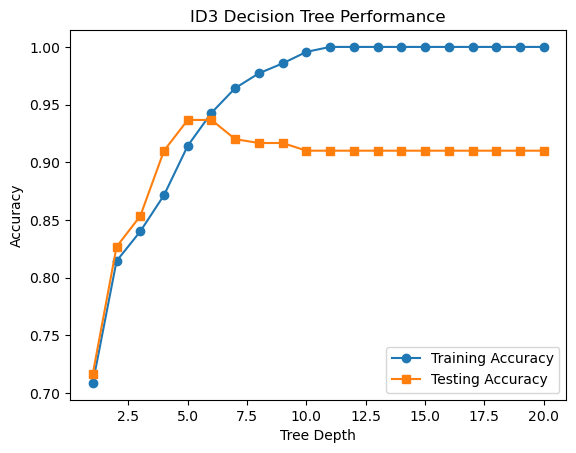

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

depths = range(1, 21)
train_accuracies, test_accuracies = zip(*[
    (accuracy_score(y_train, 
DecisionTreeClassifier(criterion='entropy', max_depth=d, 
random_state=42).fit(X_train, y_train).predict(X_train)), 
     accuracy_score(y_test,
DecisionTreeClassifier(criterion='entropy', max_depth=d, 
random_state=42).fit(X_train, y_train).predict(X_test))) 
    for d in depths
])

plt.plot(depths, train_accuracies, label= 'Training Accuracy', marker= 'o')
plt.plot(depths, test_accuracies, label= 'Testing Accuracy', marker= 's')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('ID3 Decision Tree Performance')
plt.legend()
plt.show()

# 6 gpt 1

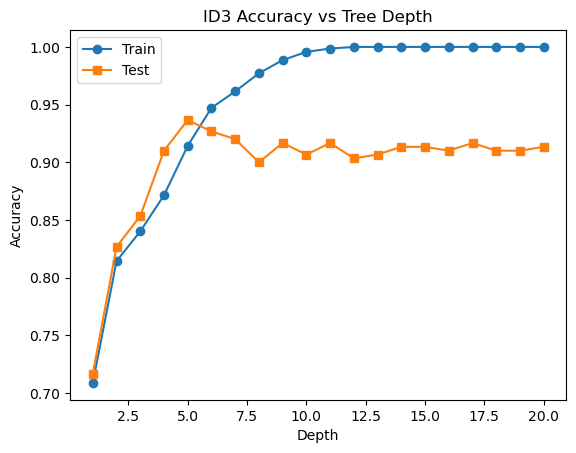

In [3]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

depths = range(1, 21)
train_acc = []
test_acc = []

for d in depths:
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=d).fit(X_train, y_train)
    train_acc.append(clf.score(X_train, y_train))
    test_acc.append(clf.score(X_test, y_test))

plt.plot(depths, train_acc, label='Train', marker='o')
plt.plot(depths, test_acc, label='Test', marker='s')
plt.xlabel("Depth")
plt.ylabel("Accuracy")
plt.title("ID3 Accuracy vs Tree Depth")
plt.legend()
plt.show()

# 6 gpt 2

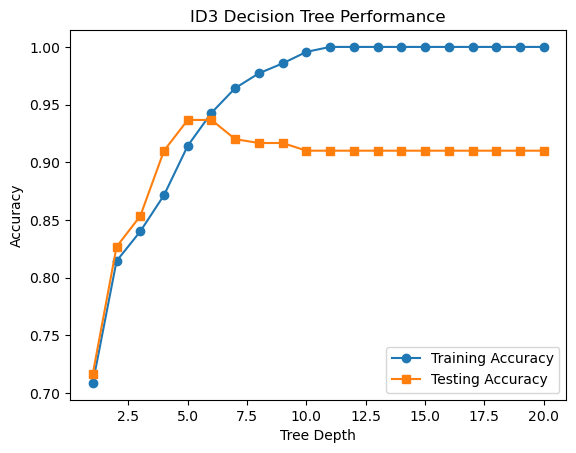

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

depths = range(1, 21)
train_acc = []
test_acc = []

for d in depths:
    train_model = DecisionTreeClassifier(criterion='entropy', max_depth=d, random_state=42).fit(X_train, y_train)
    test_model = DecisionTreeClassifier(criterion='entropy', max_depth=d, random_state=42).fit(X_train, y_train)
    train_acc.append(accuracy_score(y_train, train_model.predict(X_train)))
    test_acc.append(accuracy_score(y_test, test_model.predict(X_test)))

plt.plot(depths, train_acc, label='Training Accuracy', marker='o')
plt.plot(depths, test_acc, label='Testing Accuracy', marker='s')
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.title("ID3 Decision Tree Performance")
plt.legend()
plt.show()


# 9 og

In [4]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

data = fetch_california_housing()
X,y = data.data, data.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R2 (Coefficient of Determination): {r2}')

Mean Squared Error: 0.5558915986952442
R2 (Coefficient of Determination): 0.575787706032451


# 9 chatgpt

In [5]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

X, y = fetch_california_housing(return_X_y=True)

X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

MSE: 0.5558915986952442
R²: 0.575787706032451


# 10 og

Binary Classification Report (0vs 1):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1343
           1       1.00      1.00      1.00      1600

    accuracy                           1.00      2943
   macro avg       1.00      1.00      1.00      2943
weighted avg       1.00      1.00      1.00      2943


Multiclass Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1343
           1       0.94      0.97      0.95      1600
           2       0.91      0.90      0.91      1380
           3       0.90      0.89      0.89      1433
           4       0.91      0.92      0.92      1295
           5       0.88      0.88      0.88      1273
           6       0.94      0.95      0.95      1396
           7       0.93      0.94      0.93      1503
           8       0.89      0.85      0.87      1357
           9       0.90      0.88      0.89      1420

    

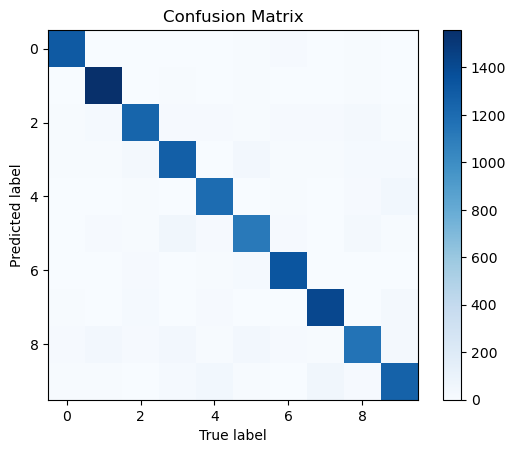

In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt

mnist=fetch_openml('mnist_784',version=1, parser='auto')
x,y=mnist.data/255.0,mnist.target.astype(int)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

binary_mask_train=(y_train==0)|(y_train==1)
binary_mask_test=(y_test==0)|(y_test==1)

x_train_bin,y_train_bin=x_train[binary_mask_train],y_train[binary_mask_train]
x_test_bin,y_test_bin=x_test[binary_mask_test],y_test[binary_mask_test]

model_bin=LogisticRegression(max_iter=1000).fit(x_train_bin,y_train_bin)

y_pred_bin=model_bin.predict(x_test_bin)
print("Binary Classification Report (0vs 1):")
print(classification_report(y_test_bin,y_pred_bin))

model_multi=LogisticRegression(max_iter=1000,multi_class='ovr').fit(x_train,y_train)
y_pred_multi=model_multi.predict(x_test)
print("\nMulticlass Classification Report:")
print(classification_report(y_test,y_pred_multi))

conf_matrix=confusion_matrix(y_test,y_pred_multi)
plt.imshow(conf_matrix,cmap="Blues",interpolation='nearest')
plt.colorbar()
plt.title("Confusion Matrix")
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.show()

# 10 chatgpt

Binary (0 vs 1):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1343
           1       1.00      1.00      1.00      1600

    accuracy                           1.00      2943
   macro avg       1.00      1.00      1.00      2943
weighted avg       1.00      1.00      1.00      2943

Multiclass:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      1343
           1       0.94      0.97      0.95      1600
           2       0.91      0.90      0.91      1380
           3       0.90      0.89      0.89      1433
           4       0.91      0.92      0.92      1295
           5       0.88      0.88      0.88      1273
           6       0.94      0.95      0.95      1396
           7       0.93      0.94      0.93      1503
           8       0.89      0.85      0.87      1357
           9       0.90      0.88      0.89      1420

    accuracy                           0.92   

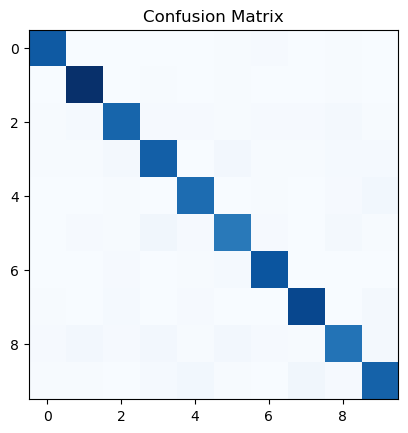

In [2]:
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

X, y = fetch_openml('mnist_784', version=1, parser='auto', as_frame=False, return_X_y=True)
X, y = X / 255.0, y.astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Binary classification (0 vs 1)
b_train = y_train <= 1
b_test = y_test <= 1
model_bin = LogisticRegression(max_iter=1000).fit(X_train[b_train], y_train[b_train])
print("Binary (0 vs 1):\n", classification_report(y_test[b_test], model_bin.predict(X_test[b_test])))

# Multiclass classification
model_all = LogisticRegression(max_iter=1000, multi_class='ovr').fit(X_train, y_train)
print("Multiclass:\n", classification_report(y_test, model_all.predict(X_test)))

# Confusion matrix
plt.imshow(confusion_matrix(y_test, model_all.predict(X_test)), cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# 10 chatgpt 2

Binary Classification Report (0 vs 1):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1343
           1       1.00      1.00      1.00      1600

    accuracy                           1.00      2943
   macro avg       1.00      1.00      1.00      2943
weighted avg       1.00      1.00      1.00      2943


Multiclass Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1343
           1       0.94      0.97      0.95      1600
           2       0.91      0.90      0.91      1380
           3       0.90      0.89      0.89      1433
           4       0.91      0.92      0.92      1295
           5       0.88      0.88      0.88      1273
           6       0.94      0.95      0.95      1396
           7       0.93      0.94      0.93      1503
           8       0.89      0.85      0.87      1357
           9       0.90      0.88      0.89      1420

   

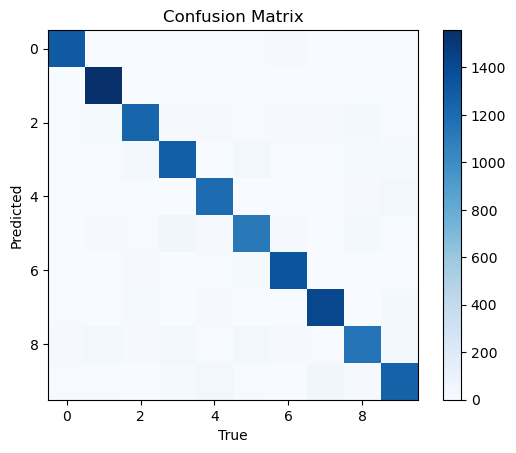

In [3]:
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

x, y = fetch_openml('mnist_784', version=1, parser='auto', as_frame=False, return_X_y=True)
x, y = x / 255.0, y.astype(int)
xtr, xte, ytr, yte = train_test_split(x, y, test_size=0.2, random_state=42)

# Binary classification (0 vs 1)
btr = (ytr < 2); bte = (yte < 2)
m1 = LogisticRegression(max_iter=1000).fit(xtr[btr], ytr[btr])
print("Binary Classification Report (0 vs 1):")
print(classification_report(yte[bte], m1.predict(xte[bte])))

# Multiclass classification
m2 = LogisticRegression(max_iter=1000, multi_class='ovr').fit(xtr, ytr)
print("\nMulticlass Classification Report:")
yp = m2.predict(xte)
print(classification_report(yte, yp))

# Confusion matrix
plt.imshow(confusion_matrix(yte, yp), cmap="Blues")
plt.title("Confusion Matrix"); plt.xlabel("True"); plt.ylabel("Predicted")
plt.colorbar(); plt.show()


# 7 a og

In [15]:
#Implementing Supervised and Unsupervised Learning
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=200, n_features=4, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

svm = SVC(kernel='linear', probability=True)
svm.fit(X_train, y_train)
svm_accuracy = accuracy_score(y_test, svm.predict(X_test))
print(f"SVM Accuracy: {svm_accuracy: .2f}")

kmeans = KMeans(n_clusters=2, n_init=10, random_state=42)
kmeans_accuracy = accuracy_score(y_test, kmeans.fit_predict(X_test))
print(f"KMeans Accuracy: {kmeans_accuracy: .2f}")

SVM Accuracy:  0.88
KMeans Accuracy:  0.42


# 7a chatgpt

In [6]:
#Implementing Supervised and Unsupervised Learning
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

X, y = make_classification(200, 4, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

svm = SVC(kernel='linear').fit(X_train, y_train)
print(f"SVM Accuracy: {accuracy_score(y_test, svm.predict(X_test)):.2f}")

kmeans = KMeans(n_clusters=2, n_init=10, random_state=42).fit(X_test)
print(f"KMeans Accuracy: {accuracy_score(y_test, kmeans.labels_):.2f}")

SVM Accuracy: 0.88
KMeans Accuracy: 0.42


# 7b og

In [7]:
#Implementing Semi-supervised and Reinforcement Learning
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.semi_supervised import SelfTrainingClassifier
import random
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=200, n_features=4, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

y_train_semi = np.copy(y_train)
y_train_semi[np.random.rand(len(y_train_semi)) < 0.3] = -1
semi_supervised = SelfTrainingClassifier(SVC(kernel='linear', probability=True))
semi_supervised.fit(X_train, y_train_semi)
print(f"Semi-supervised Accuracy: {accuracy_score(y_test, semi_supervised.predict(X_test)): .2f}")

actions = [random.choice([0,1]) for _ in range(len(X_test))]
print(f"Reinforcement Accuracy: {accuracy_score(y_test, actions): .2f}")

Semi-supervised Accuracy:  0.93
Reinforcement Accuracy:  0.62


# 7b chatgpt

In [16]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import random

X,y=make_classification(n_samples=200,n_features=4,n_classes=2,random_state=42)
Xt,Xv,yt,yv=train_test_split(X,y,test_size=0.3,random_state=42)

yt_semi=yt.copy()
yt_semi[np.random.rand(len(yt_semi))<0.3]=-1

clf=SelfTrainingClassifier(SVC(kernel='linear',probability=True))
clf.fit(Xt,yt_semi)
print(f"Semi-supervised Accuracy: {accuracy_score(yv,clf.predict(Xv)):.2f}")

actions=[random.choice([0,1]) for _ in range(len(Xv))]
print(f"Reinforcement Accuracy: {accuracy_score(yv,actions):.2f}")

Semi-supervised Accuracy: 0.87
Reinforcement Accuracy: 0.63
